# Introduction


Hi I'm lacakp : )
github: https://github.com/lacakp

- Classification Apple Banana and Tomato

- Transfer Learning Using Keras -- MobileNetv2 :
Efficient Convolutional Neural Networks for Mobile Vision Applications

- Transfer Learning คือ เทคนิคที่ช่วยลดเวลาการเทรนโมเดล Deep Learning ด้วยการนำบางส่วนของโมเดลที่เทรนเรียบร้อยแล้ว กับงานที่ใกล้เคียงกัน มาใช้เป็นส่วนหนึ่งของโมเดลใหม่

- MobileNet คืออะไร : Keng Surapong 2020-01-12 
- https://www.bualabs.com/archives/3439/tensorflow-js-tutorial-build-image-classification-javascript-mobilenet-pretrained-model-tfjs-ep-7/
- Transfer Learning คืออะไร : Keng Surapong 2020-01-14
- https://www.bualabs.com/archives/3493/what-is-transfer-learning-build-headless-mobilenet-model-transfer-learning-machine-learning-mobilenet-json-retrain-webcam-tensorflow-js-tfjs-ep-10/
- Neural Network Programming : โดย ชิตพงษ์ กิตตินราดร | มกราคม 2563
- https://guopai.github.io/ml-blog15.html
- 3 วิธีในการสร้างโมเดล Machine Learning ด้วย Keras และ TensorFlow 2.0 : ICHI.PRO
- https://ichi.pro/th/3-withi-ni-kar-srang-model-machine-learning-dwy-keras-laea-tensorflow-2-0-244131078796499

#Pipeline
1. Data Acquisition
2. Training The Model
3. Evaluation
4. Prediction
5. Deploy Model

## Data Acquisition

### get data

Fruits 360 : __https://www.kaggle.com/moltean/fruits__ 

A dataset with 90380 images of 131 fruits and vegetables

<img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" scale="0">

This work is licensed under a 
<a rel="license" href="https://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>

__ทำการดาวน์โหลดข้อมูล Dataset และ ทำการ unzip ไฟล์ Train_ABT.zip ที่ดาวน์โหลดมา__

In [4]:
!wget https://raw.githubusercontent.com/lacakp/abt-dataset/main/abt-fruit.zip
!unzip "/content/abt-fruit.zip"

Streaming output truncated to the last 5000 lines.
  inflating: abt-fruit/Tomato/Tomato 1/236_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/237_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/238_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/239_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/23_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/240_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/241_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/242_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/243_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/244_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/245_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/246_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/247_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/248_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/249_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/250_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/251_100.jpg  
  inflating: abt-fruit/Tomato/Tomato 1/252_100.jp


- Fruit and Vegetable Image Recognition 
- https://www.kaggle.com/kritikseth/fruit-and-vegetable-image-recognition

- CC0: Public Domain

### Check data

In [2]:
import os
import cv2 as cv 
from google.colab.patches import cv2_imshow
import random

In [3]:
!ls '/content/abt-fruit'

Apple  Banana  Tomato


In [4]:
print("โฟลเดอร์ทั้งหมดใน โฟลเดอร์ Apple")
!ls '/content/abt-fruit/Apple'
print("\nโฟลเดอร์ทั้งหมดใน โฟลเดอร์ Banana")
!ls '/content/abt-fruit/Banana'
print("\nโฟลเดอร์ทั้งหมดใน โฟลเดอร์ Tomato")
!ls '/content/abt-fruit/Tomato'

โฟลเดอร์ทั้งหมดใน โฟลเดอร์ Apple
'Apple Braeburn'      'Apple Granny Smith'  'Apple Red Delicious'
'Apple Crimson Snow'  'Apple Pink Lady'     'Apple Red Yellow 1'
'Apple Golden 1'      'Apple Red 1'	    'Apple Red Yellow 2'
'Apple Golden 2'      'Apple Red 2'
'Apple Golden 3'      'Apple Red 3'

โฟลเดอร์ทั้งหมดใน โฟลเดอร์ Banana
 Banana  'Banana Lady Finger'  'Banana Red'

โฟลเดอร์ทั้งหมดใน โฟลเดอร์ Tomato
'Tomato 1'  'Tomato 4'		 'Tomato Maroon'
'Tomato 2'  'Tomato Cherry Red'  'Tomato not Ripened'
'Tomato 3'  'Tomato Heart'	 'Tomato Yellow'


In [5]:
# ฟังก์ชันสำหรับโหลดภาพเข้ามา
def load_images_from_folder(folder):
    images = [] # สร้าง list สำหรับเก็บภาพ 
    for filename in os.listdir(folder): # ลูปดูภาพใน folder 
        img = cv.imread(os.path.join(folder,filename))  # ทำการอ่านภาพจาก ชื่อภาพ โดย cv.imread เก็บไว้ img 
        if img is not None: # เช็คดูว่าถ้าไม่ได้เป็นค่าว่าง 
            images.append(img) # ให้เก็บไว้ใน list images
    return images # คืนค่าเป็น list Images

In [6]:
apple_class_path = '/content/abt-fruit/Apple/'      # path Apple In Folder abt-fruit
banana_class_path = '/content/abt-fruit/Banana/'    # path Banana In Folder abt-fruit
tomato_class_path = '/content/abt-fruit/Tomato/'    # path Tomato In Folder abt-fruit

apple_folder = os.listdir(apple_class_path)     # list directory in abt-fruit/apple
banana_folder = os.listdir(banana_class_path)   # list directory in abt-fruit/banana
tomato_folder = os.listdir(tomato_class_path)   # list directory in abt-fruit/Tomato

# initial for count imagee
apple_count, banana_count, tomato_count = 0, 0, 0  

# initial for keep all image after use load_image_from_folder function
apple_all_image, banana_all_image, tomato_all_image = [], [], [] 



import numpy as np
import matplotlib.pyplot as plt

# Function Check_image
def check_image(var_count, var_all_image, var_fruit_folder, var_class_path):
  """

  check_image function for check count image in dataset then show three random image
  ------------
  var_count : for count for each fruit image
  var_all_image : for keep all array of image
  var_fruit_folder : is list of fruit folder
  var_class_path : is variable path folder image


  """
  for folder in var_fruit_folder:
    count_image = load_images_from_folder(var_class_path + folder)
    var_all_image += load_images_from_folder(var_class_path + folder)
    var_count += len(count_image)
    print("ภาพในโฟลเดอร์", folder , "\t\tมีภาพอยู่", len(count_image))

  print("----------------\nมีภาพ", var_class_path[15:], "ทั้งหมด", var_count,   "ภาพ")
  var_ran = var_all_image
  for i in range(3):   
    ran = random.randint(1, var_count)
    cv2_imshow(var_ran[ran])

  return var_all_image

ภาพในโฟลเดอร์ Apple Crimson Snow 		มีภาพอยู่ 444
ภาพในโฟลเดอร์ Apple Red Delicious 		มีภาพอยู่ 490
ภาพในโฟลเดอร์ Apple Red 3 		มีภาพอยู่ 429
ภาพในโฟลเดอร์ Apple Red Yellow 2 		มีภาพอยู่ 672
ภาพในโฟลเดอร์ Apple Golden 2 		มีภาพอยู่ 492
ภาพในโฟลเดอร์ Apple Braeburn 		มีภาพอยู่ 492
ภาพในโฟลเดอร์ Apple Golden 1 		มีภาพอยู่ 480
ภาพในโฟลเดอร์ Apple Golden 3 		มีภาพอยู่ 481
ภาพในโฟลเดอร์ Apple Pink Lady 		มีภาพอยู่ 456
ภาพในโฟลเดอร์ Apple Granny Smith 		มีภาพอยู่ 492
ภาพในโฟลเดอร์ Apple Red Yellow 1 		มีภาพอยู่ 492
ภาพในโฟลเดอร์ Apple Red 2 		มีภาพอยู่ 492
ภาพในโฟลเดอร์ Apple Red 1 		มีภาพอยู่ 492
----------------
มีภาพ uit/Apple/ ทั้งหมด 6404 ภาพ


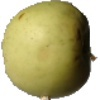

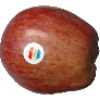

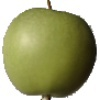

In [7]:
apple_img = check_image(apple_count, apple_all_image, apple_folder, apple_class_path)

ภาพในโฟลเดอร์ Banana 		มีภาพอยู่ 490
ภาพในโฟลเดอร์ Banana Lady Finger 		มีภาพอยู่ 450
ภาพในโฟลเดอร์ Banana Red 		มีภาพอยู่ 490
----------------
มีภาพ uit/Banana/ ทั้งหมด 1430 ภาพ


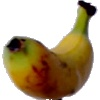

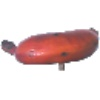

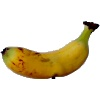

In [8]:
banana_img = check_image(banana_count, banana_all_image, banana_folder, banana_class_path)

ภาพในโฟลเดอร์ Tomato 3 		มีภาพอยู่ 738
ภาพในโฟลเดอร์ Tomato not Ripened 		มีภาพอยู่ 474
ภาพในโฟลเดอร์ Tomato Yellow 		มีภาพอยู่ 459
ภาพในโฟลเดอร์ Tomato 4 		มีภาพอยู่ 479
ภาพในโฟลเดอร์ Tomato Cherry Red 		มีภาพอยู่ 492
ภาพในโฟลเดอร์ Tomato Maroon 		มีภาพอยู่ 367
ภาพในโฟลเดอร์ Tomato 1 		มีภาพอยู่ 738
ภาพในโฟลเดอร์ Tomato 2 		มีภาพอยู่ 672
ภาพในโฟลเดอร์ Tomato Heart 		มีภาพอยู่ 684
----------------
มีภาพ uit/Tomato/ ทั้งหมด 5103 ภาพ


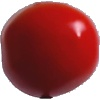

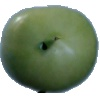

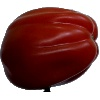

In [9]:
tomato_img = check_image(tomato_count, tomato_all_image, tomato_folder, tomato_class_path)

## Split - Train data and validation data

- เตรียม library ต่างๆที่จำเป็น ต้องใช้ในการ Train model

In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

- กำหนด shape ของภาพเป็น 224x224


In [11]:
height = 224
width = 224
batch_size = 32
data_dir = '/content/abt-fruit'

- ดึงข้อมูลจาก path data_dir ซึ่งคือ โฟลเดอร์ Train เพื่อทำการแบ่งเป็น  training set 70 % และ validation set อยู่ 30 %

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'training',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 12937 files belonging to 3 classes.
Using 9056 files for training.


- ดึงข้อมูลจาก path data_dir ซึ่งคือ โฟลเดอร์ Train เพื่อทำการแบ่งเป็น validation set

In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'validation',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 12937 files belonging to 3 classes.
Using 3881 files for validation.


- เช็คดู class_names

In [14]:
classes = train_ds.class_names
print(classes)
print(train_ds)

['Apple', 'Banana', 'Tomato']
<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


## Training The Model

### MobileNetv2

- Document - MobileNetv2 model
- https://keras.io/api/applications/mobilenet/


- Load Model

In [15]:
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights = 'imagenet')

In [16]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [17]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### Train
https://keras.rstudio.com/reference/fit.html#arguments

validation_data	
Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. This could be a list (x_val, y_val) or a list (x_val, y_val, val_sample_weights). validation_data will override validation_split.


- หมายถึง ข้อมูลการตรวจสอบ ประเมินค่า loss และ model metrics เมื่อจบ epoch


epochs
Number of epochs to train the model. Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.

- epochs	คือ จำนวนครั้งในการฝึกโมเดล

In [ ]:
epochs = 15
ABTFruit = model.fit(train_ds,
                     validation_data=val_ds, 
                     epochs=epochs
                     )

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


 30/283 [==>...........................] - ETA: 24:56 - loss: 0.5504 - accuracy: 0.9167

## Evaluation

- Evaluation model ทำการพล็อตกราฟดูค่าความถูกต้องและค่าความผิดพลาด acc/loss

In [ ]:
# Model Accuracy
fig1 = plt.gcf()

plt.plot(ABTFruit.history['accuracy'])
plt.plot(ABTFruit.history['val_accuracy'])
plt.axis(ymin=0.7, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# Model Loss
plt.plot(ABTFruit.history['loss'])
plt.plot(ABTFruit.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Prediction

- ทำการนำโมลที่เทรนได้มาใช้ มาทำนายจากภาพ โดยใช้การอัพโหลดภาพ

In [ ]:
def pred_func(image):
  """
  arg = image
  
  return :
  output_class : result class name
  pred : 
  """
  img = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
  img = np.expand_dims(img, axis=0)
  print(img.shape)
  pred = model.predict(img)
  # print(pred)
  output_class = np.argmax(pred)
  return output_class, pred

In [ ]:
# for upload image
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2

uploaded = files.upload()


print(uploaded.keys())
print("ภาพที่อัพโหลดขึ้นมาคือ", list(uploaded)[0])
upload_img = list(uploaded)[0]
image = cv2.imread(upload_img)
# print(image)
cv2_imshow(image)

# ---------------------------------
output, pred = pred_func(image)
if output == 0:
  print("Apple")
elif output == 1:
  print("Banana")
elif output == 2:
  print("Tomato")
else:
  pass

In [ ]:
print(pred)

In [ ]:
print(np.argmax(pred))

## Deploy Model

- ทำการ save model เป็นไฟล์ โมเดล .h5 

In [ ]:
model.save('AppleBananaTomato', save_format='h5')

In [ ]:
test_load_model = tf.keras.models.load_model('/content/AppleBananaTomato')

- โหลดภาพมาใหม่

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload() # อัปโหลดไฟล์
print("ภาพที่อัพโหลดขึ้นมาคือ", list(uploaded)[0]) # แสดงชื่อไฟล์ภาพ
image = cv2.imread( list(uploaded)[0] ) # อ่านไฟล์ภาพ
cv2_imshow(image) # แสดงภาพ
print(image.shape)

- แปลง shape ภาพ

In [ ]:
try:
  image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA) # ทำการแปลง  shape ภาพโดย interpolation  cv2.INTER_AREA
  img = np.expand_dims(image, axis=0) # expand dimentional axis = 0
  print(img.shape) # แสดงข้อมูล shape ภาพ
except:
  pass

In [ ]:
pred = test_load_model.predict(img)
print(type(pred))


In [ ]:
output_class = classes[np.argmax(pred)]
print("This is ", output_class)